# Problème 2: Reconnaissance d’Image
## 1- Definition et Explication
#### 
L’ensemble de données CIFAR-10 contient 60 000 images couleur 32x32 dans 10 classes différentes. Les 10 classes différentes représentent les avions, les voitures, les oiseaux, les chats, les cerfs, les chiens, les grenouilles, les chevaux, les navires et les camions. Il y a 6 000 images de chaque classe.
#### 
ici nous sommes dans un apprentissage supervisé car les données d'entrées et les target sont fournis à l'entrée.Un apprentissage supervisé est un apprentissage dans lequel les données d'entrées et de sorties sont données.
#### 
Pour cela nous avons opter pour le modèle séquentiel (Sequential), en utilisant les fonctions d'activation ReLu et Softmax


# 2- Formulation Mathématique du Problème et Solution
Le Modèle séquentiel (Sequential) est une pile de layers (couches) linéaire. Les layers peuvent être décrites de façon très simple. Chaque définition de layer requiert une ligne de code.
#### 
ReLU est une fonction d’activation très couramment utilisée. Acronyme de Rectified Linear Unit (unité linéaire rectifiée), elle permet tout simplement de remplacer les résultats négatifs par zéro.

Elle peut s’exprimer mathématiquement de la façon suivante :

f(x) = max(0,x)

Ou d’un point de vue algorithmique de la façon suivante :

fonction relu(x)

si x >0 retourne x sinon retourne 0

fin fonction
#### 
La fonction Softmax permet elle de transformer un vecteur réel en vecteur de probabilité.

On l’utilise souvent dans la couche finale d’un modèle de classification, notamment pour les problèmes multiclasse.

Dans la fonction Softmax, chaque vecteur est traité indépendamment. L’argument axis définit l’axe d’entrée sur lequel la fonction est appliquée. 

Fonction_Softmax(x) = exp(x) / tf.reduce_sum(exp(x))

fonction_Softmax(x) = exp(x) / sum(exp(xi))



## importation des packages

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from tensorflow.keras import Sequential, datasets
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model

# 3-Les phases

## Exploration du jeu de données

In [2]:
#  Chargement du jeu de données 
Cifar10 = keras.datasets.cifar10

In [3]:
# division du jeu de données 
(X_train,Y_train),(X_test,Y_test) = Cifar10.load_data()

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [5]:
# Définition du tableau. Chaque élément du tableau représente la valeur entière des étiquettes
class_=['Avion','Automobile','Oiseau','Chat','Cerf','Chien','Grenouille','Cheval','Navire','Camion']

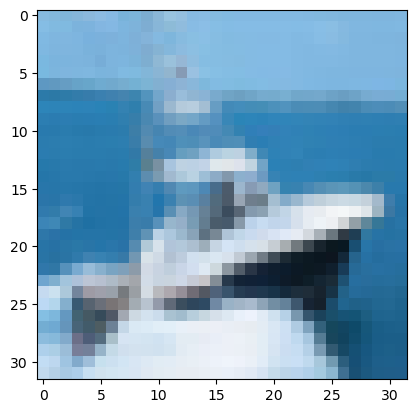

In [6]:
plt.imshow(X_train[8])

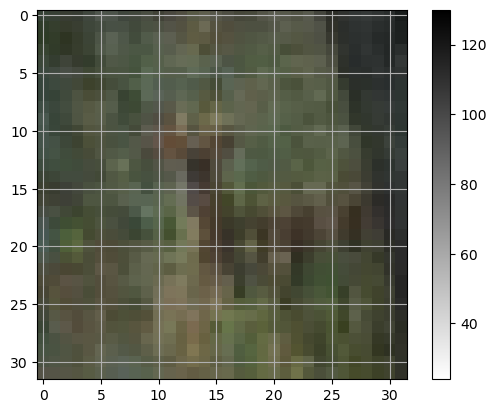

Class ID : [4] 
 le nom de la class est: Cerf


In [7]:
# inspection des données en array
index = 10 # on peut Modifier ce numéro de l'indexe
plt.imshow(X_train[index], cmap = plt.cm.binary) # visualisation de la 10ème image
plt.colorbar() # Affichage de la barre sur le côté droit de l’image
plt.grid(True) # affichage de la grille
plt.show()
print("Class ID : %s \n le nom de la class est: %s" % (Y_train[index], class_[Y_train[index][0]]))


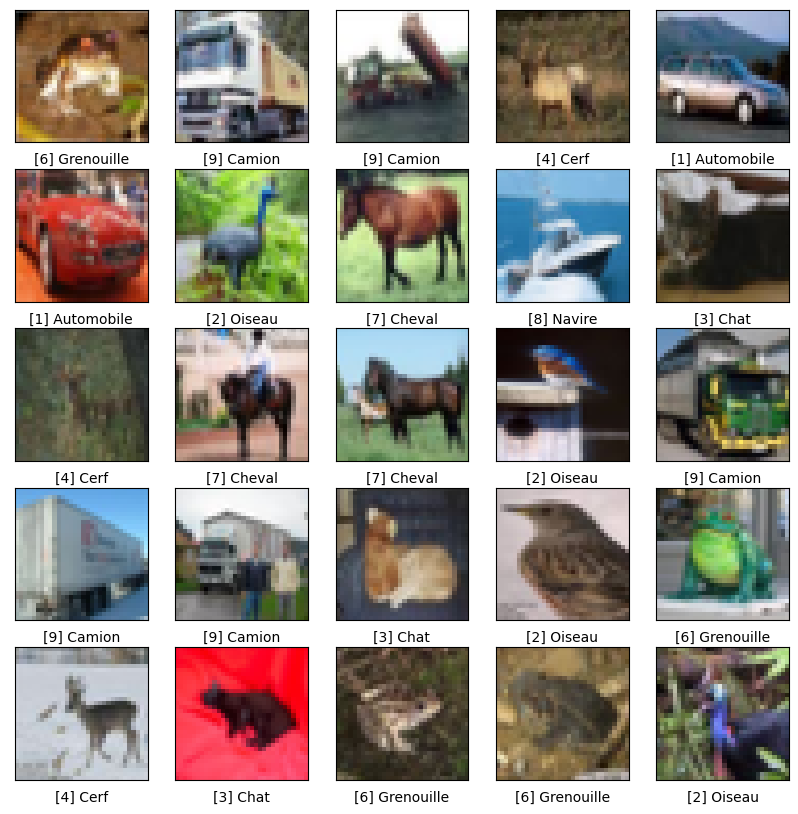

In [8]:
# Affichage des 25 premières images des données de test
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1) # matrice de tableau 5 X 5
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)# affichage de chaque  image en  binaire/noir et blanc
    # les étiquettes sont des tableaux C’est pourquoi j'ai  besoin de l’index supplémentaire
    plt.xlabel("%s %s" % (Y_train[i], class_[Y_train[i][0]]))# L'Attribution d’un nom à chaque image

## preprocessing des données

### Mise à l’échelle des valeurs de l’image

In [9]:
# La valeur en pixels de l’image est comprise entre 0 et 255
X_train = X_train/255 # Donc,je met à l’échelle la valeur entre 0 et 1  en divisant chaque valeur par 255
print(X_train.shape)
X_test = X_test/255
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### One hot des étiquettes 

In [10]:
# Avant l'encodage à chaud sur les étiquettes 
print("Y_train Shape:%s and value : %s" % (Y_train.shape, Y_train))
print("Y_test Shape: %s and value : %s" % (Y_test.shape, Y_test))

Y_train Shape:(50000, 1) and value : [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Y_test Shape: (10000, 1) and value : [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [11]:
# Après l'encodage à chaud sur les étiquettes 
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape:%s and value : %s" % (Y_train.shape,Y_train[0]))
print("Y_test Shape: %s and value : %s" % (Y_test.shape, Y_test[1]))

Y_train Shape:(50000, 10) and value : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Y_test Shape: (10000, 10) and value : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Choix du Modèle et entrainement du modèle

In [12]:
model = models.Sequential() # Création d'un modèle séquentiel, c’est-à-dire un réseau neuronal vide qui ne contient aucune couche

# Dans le premier bloc, nous devons mentionner input_shape
model.add(layers.Conv2D (64, (3, 3), input_shape = (32 ,32, 3), activation = 'relu')) #  Ajout du premier bloc convolutif. Pour traiter les images, j'utilise Conv2D et pour la couleur et la forme,Conv3D
model.add(layers.Conv2D (64, (3, 3), input_shape = (32, 32, 3), activation= 'relu')) 

#  Ajout de la couche de pooling max
model.add(layers.MaxPooling2D (pool_size = (2, 2)))
model.add(Dropout(0.25))

#Ajout d'un deuxième bloc convolutif
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))

# Ajout d'une nouvelle couche de pooling max
model.add(layers.MaxPooling2D (pool_size = (2, 2)))
model.add(Dropout(0.25))

# Ajout d'un troisième bloc convolutif
model.add(layers.Conv2D (256, (3, 3), activation = 'relu'))

# Ajout d'une nouvelle couche de pooling max
model.add(layers.MaxPooling2D (pool_size = (2, 2)))
model.add(Dropout(0.25))

# Ajout d'une couche flattena. flatten convertit simplement les matrices en tableau
model.add(layers.Flatten(input_shape=(32, 32))) # cela aplatit l’image et après produit une classification 
               ## Bloc de classification ##
# La couche Dence fait la classification et est un réseau neuronal profond. La couche dense accepte toujours le tableau.
model.add(layers.Dense(128, activation = 'relu')) 
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(80, activation = 'relu'))
# Ajout de la couche de sortie
model.add(layers.Dense(10, activation = 'softmax')) # en tant que couche  de sortie dans l’image ci-dessus, elle a normalement une fonction d'activation softmax


In [13]:
# Compilation du modèle
# Si nous utilisons l’activation SoftMax dans la couche de sortie, l’optimiseur Best Fit est categorical_crossentropy
# Pour l’activation sigmoïde dans la couche de sortie, la perte sera binary_crossentropy
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 
# si j'avais pas opter pour One Hot Encoding alors je pouvais utiliser loss='sparse_categorical_crossentropy'
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

In [14]:
# Entrainement du modèle 
# L’utilisation du GPU accélère vraiment ce code
X_train2 = X_train.reshape(50000,32,32,3)
X_test2 = X_test.reshape(10000,32,32,3)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

model.fit(X_train2, Y_train, epochs = 40 , batch_size = 56, verbose = True, validation_data = (X_test2, Y_test))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/40
893/893 [==============================] - 663s 739ms/step - loss: 1.7521 - accuracy: 0.3396 - val_loss: 1.3978 - val_accuracy: 0.4875
Epoch 2/40
893/893 [==============================] - 683s 764ms/step - loss: 1.3070 - accuracy: 0.5273 - val_loss: 1.1932 - val_accuracy: 0.5785
Epoch 3/40
893/893 [==============================] - 682s 763ms/step - loss: 1.1256 - accuracy: 0.5979 - val_loss: 1.0118 - val_accuracy: 0.6500
Epoch 4/40
893/893 [==============================] - 725s 812ms/step - loss: 1.0161 - accuracy: 0.6428 - val_loss: 0.9434 - val_accuracy: 0.6732
Epoch 5/40
893/893 [==============================] - 709s 794ms/step - loss: 0.9371 - accuracy: 0.6724 - val_loss: 0.9668 - val_accuracy: 0.6673
Epoch 6/40
893/893 [==============================] - 773s 866ms/step - loss: 0.8776 - accuracy: 0.6938 - val_loss: 0.8349 - val_accuracy: 0.7117
Epoch 7/40
893/893 [==============================] - 748s 838

## Evaluation du Modèle

In [17]:
# évaluation du modèle
test_loss, test_acc = model.evaluate(X_test2, Y_test)
print("accuracy:", test_acc)

313/313 [==============================] - 31s 99ms/step - loss: 0.6429 - accuracy: 0.7923
accuracy: 0.7922999858856201


In [19]:
# prédiction des étiquettes pour les données de test
predictions = model.predict(X_test2)

# Prédiction du 1er résultat. Il montrera les 10 prédictions d’étiquettes pour l’image de test
print("1. Prediction array : %s" % (predictions[0]))

# Nous vérifierons que le résultat pour l’étiquette a la plus grande confiance
print("2. Label number having highest confidence in prediction array : %s" % (np.argmax(predictions[0])))

# vérification de l’étiquette dans les données de test
print("3. Actual label in dataset: %s" % (Y_test[0]))

313/313 [==============================] - 32s 99ms/step
1. Prediction array : [0.0329898  0.01038658 0.01750891 0.76886064 0.01046364 0.08625323
 0.00495486 0.01808718 0.04050166 0.00999345]
2. Label number having highest confidence in prediction array : 3
3. Actual label in dataset: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [20]:
## Test du modèle sur les données##
#création d'une fonction qui aidera à vérifier que la prédiction est vraie ou non
def plot_image(i, predictions_array, true_label, img): #prise d’index et 3 tableaux à savoir tableau de prédiction, tableau d’étiquettes vraies et tableau d’images
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap = plt.cm.binary) # Affichage de l’image en noir et blanc
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    #print(predicted_label)
    # print(true_label)
    
    if predicted_label == true_label: #configuration de la couleur de l’étiquette
        
        color='blue' # corriger puis colorer en bleue
    else:
        
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
    # Fonction pour afficher un graphique à barres indiquant si la prédiction d’image est correcte
def plot_value_array(i, predictions_array, true_label):# prendre l’index avec les prédictions et le tableau d’étiquettes réel
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = 'gray')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    

NameError: name 'class_names' is not defined

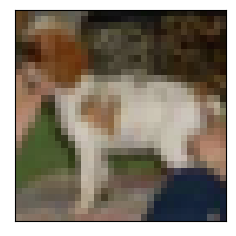

In [24]:
## Teste pour une seule image##
# Appel de la fonction
# définition des paramètres à passer à la fonction
i = 12 #Numéro d’image 56. Un choix est possible pour la valeur i  pour jouer autour
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)

plot_image(i, predictions, Y_test, X_test2)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, Y_test)
plt.show()

NameError: name 'class_names' is not defined

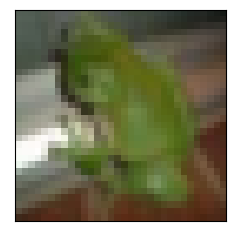

In [25]:
i = 7 # Numéro d'image 5
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, Y_test, X_test2)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, Y_test)
plt.show()

NameError: name 'class_names' is not defined

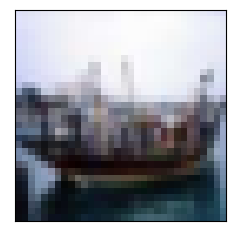

In [26]:
i = 18 # Numéro d'image 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, Y_test, X_test2)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, Y_test)
plt.show()

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 130ms/step
[[3.1548391e-06 8.8838181e-07 3.4348568e-04 2.3057581e-04 1.0481483e-03
  9.6863660e-05 9.9827385e-01 3.1438299e-07 1.8297223e-08 2.7386434e-06]]


NameError: name 'class_names' is not defined

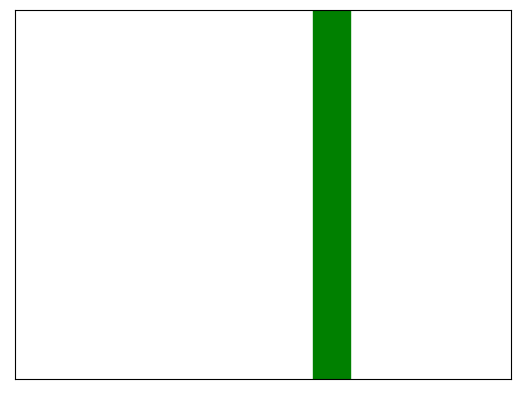

In [27]:
# Vérification de notre prédiction sur une seule image
i = 4 # Numéro d’image 0
img = X_test2[i]
print(img.shape)

img = (np.expand_dims(img, 0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions, Y_test)
_ = plt.xticks(range(10), class_names, rotation = 45)

np.argmax(predictions_single[0])

NameError: name 'class_names' is not defined

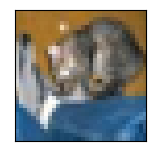

In [29]:
#Vérification de plusieurs images
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols

plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions, Y_test, X_test2)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, ytest)
plt.show()

# Conclusions

## 
Avec un modèle séquentiel complexe avec plusieurs couches de convolution et 40 époques pour l’apprentissage,j'ai pu obtenir une précision de 0,85 pour la prédiction des tests.
## 
Après avoir étudié la précision et la perte de validation, j'ai constaté que le modèle est un peu surajusté.
## 
Le modèle peut être réformé avec des couches de goutte pour réduire le surajustement.
## 
La plupart des images peuvent être identifiées, sauf dans quelques cas pour les cerfs et les automobiles. Le modèle est médiocre pour identifier les cerfs.